# full recording slope comparisons

This notebook compares the power spectra of subjects in our dataset. LASSO identified a few regions of interest when comparing DANE subjects and MCI_Controls. The most significant results:

```
Features sorted by score, using 2000 resamplings: 
(0.45950000000000002, 'FRONTAL_EYESO')
(0.42799999999999999, 'AVG_PSD_EYESO')
(0.28499999999999998, 'A31_EYESO')
(0.19850000000000001, 'B1_EYESO')
(0.16850000000000001, 'A27_EYESO')
(0.16400000000000001, 'CENTRAL_EYESO')
(0.11550000000000001, 'A30_EYESO')
(0.1065, 'A10_EYESO')
(0.10199999999999999, 'A5_EYESO')
(0.096500000000000002, 'A29_EYESO')
(0.085000000000000006, 'B3_EYESO')
(0.082000000000000003, 'A1_EYESO')
(0.075499999999999998, 'B26_EYESO')
(0.067000000000000004, 'OCCIPITAL_EYESO')
(0.0545, 'RTEMPORAL_EYESO')
(0.050500000000000003, 'B17_EYESO')
```

In [1]:
%matplotlib inline
import os
import glob
import seaborn
import numpy as np
import scipy as sp
import pandas as pd
import scipy.io
import numpy.fft
import scipy.signal
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.stats import linregress
from sklearn import linear_model
mpl.rcParams['figure.figsize'] = (16, 10)

In [2]:
subjoa = np.load('../data/pipeline-full/subjoa-2-24fit.npy').item()
subjya = np.load('../data/pipeline-full/subjya-2-24fit.npy').item()

Let's plot a few of these power spectra.

In [11]:
def ch_num(chan_name):
    """ Get channel number based on name. """
    channels = ["A1","A2","A3","A4","A5","A6","A7","A8","A10","A11","A12","A13","A14","A15","A16","A17","A18","A21","A22","A23","A24","A25","A26","A27","A29","A30","A31","B1","B2","B3","B4","B5","B6","B8","B9","B10","B11","B12","B13","B14","B17","B18","B19","B20","B21","B22","B23","B24","B26","B27","B28","B29","B30","FRONTAL","LTEMPORAL","CENTRAL","RTEMPORAL","OCCIPITAL"]
    return channels.index(chan_name)

(0, 50)

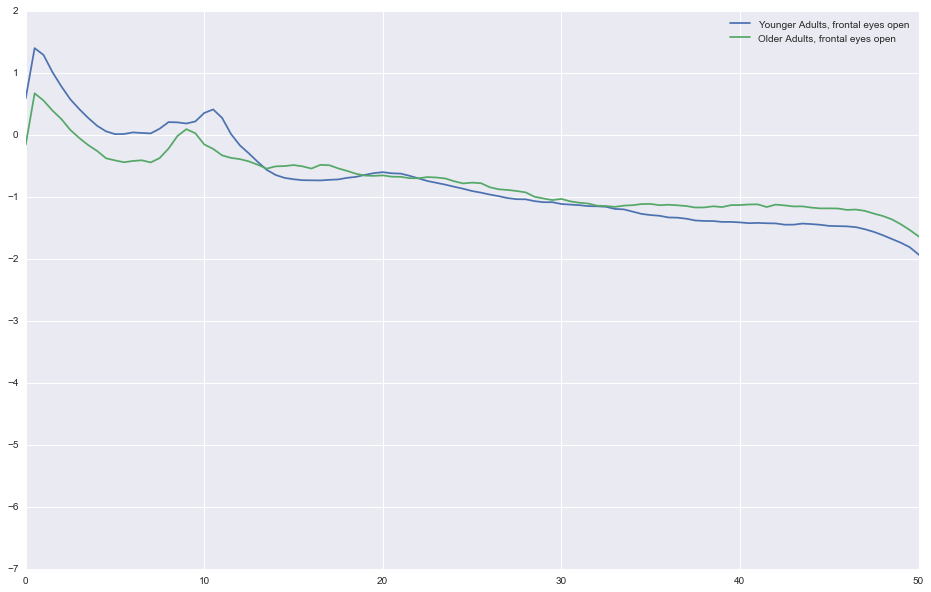

In [22]:
f = subjoa['f']
ch = ch_num('FRONTAL')
oa_frontaleyeso = np.mean([subjoa[i][ch]['eyesO_psd'] for i in range(subjoa['nbsubj']) if subjoa[i]['class'] == 'MCI_Control'], axis=0)
ya_frontaleyeso = np.mean([subjya[i][ch]['eyesO_psd'] for i in range(subjya['nbsubj'])], axis=0)
plt.plot(f, np.log10(ya_frontaleyeso), label='Younger Adults, frontal eyes open')
plt.plot(f, np.log10(oa_frontaleyeso), label='Older Adults, frontal eyes open')
plt.legend(); plt.xlim([0, 50])

(0, 50)

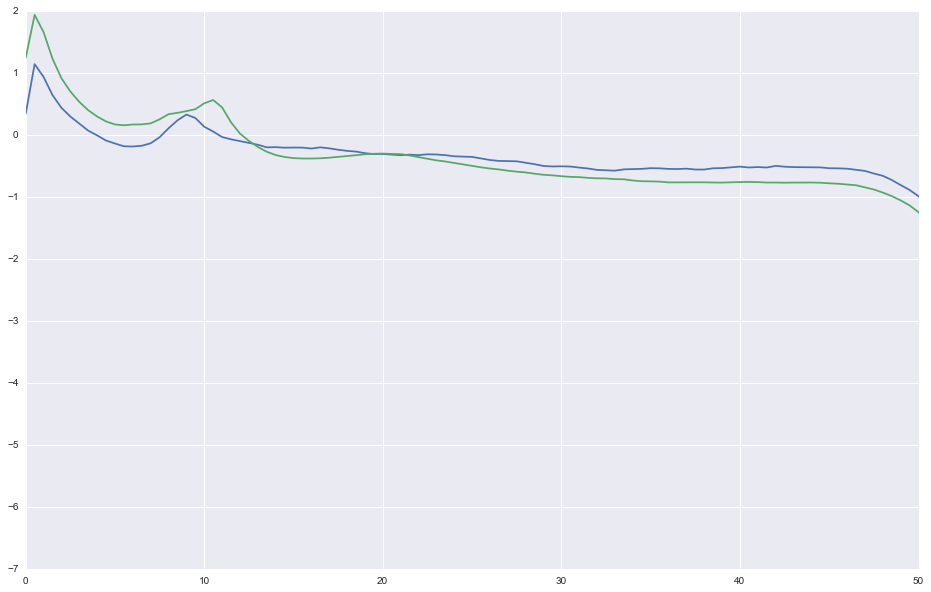

In [26]:
oa = np.mean([subjoa[i]['eyesO_psd'] for i in range(subjoa['nbsubj']) if subjoa[i]['class'] == 'MCI_Control'], axis=0)
plt.plot(f, np.log10(oa))
plt.plot(f, np.log10(subjya['eyesO_psd'])); plt.xlim([0, 50])

In [7]:
subjoa[0][54].keys()

dict_keys(['eyesO_slope', 'eyesC_psd', 'eyesO_psd', 'eyesO_psd_rm_alpha', 'eyesO_fitline', 'eyesC_psd_rm_alpha', 'eyesC_slope', 'eyesC_fitline'])